Instructions for JupyterLab
---

To execute a cell in JupyterLab, press ``shift`` + ``return``. The content may take about 60 - 75 minutes to finish. Use the first set if you need some refresher.

First make sure you use ``SageMath`` instead of regular Python. To change it follow the instructions below. 

![image1](./photos/kernel-icon.png)
![image2](./photos/kernel-pic1.png)
![image3](./photos/kernel-pic2.png)



Goal
----

This activity sheet aims at getting used to computer algebra software. There are many good (and free) choices such as SageMath (the one we are using), Singular, and Macaulay2.

Here is a link to [Sagemath webpage](https://www.sagemath.org). The current IDE is called [JupyterLab](https://jupyter.org) and the school server is provided by the CSUSB's [high-performance computing program](https://www.csusb.edu/academic-technologies-innovation/xreal-lab-and-high-performance-computing/high-performance-computing).

At the end of the notes, you will be asked two questions and submit your answers to Canvas. We will mainly focus on the following.

1. Use SageMath to describe $R_\sigma$ as a quotient of a polynomial ring. That is to find the generators of the ideal $I$ such that $R_\sigma \cong \mathbb{C} [x_1,\dots, x_k]/I$.
1. Use SageMath to resolve the singularities of $R_\sigma$ when $\sigma$ is a strongly convex rational polyhedral cone of dimension two in $\mathbb{R}^2$.

--- 

In the next few cells, we will review the process $\sigma \to \sigma^\vee \to S_\sigma$ and how to get $R_\sigma$.

In [1]:
# Here is a cone generated by e_2, 2e_1-e_2
# We understand this cone very well. 
# Its dual cone is generated by e_1^* and e_1^* + 2e_2^*;
# Its semigroup is generated by e_1^*, e_1^* + e_2^*, and e_1^* + 2e_2^*;
# Its ring is isomorphic to C[x,y,z]/(xz-y^2)
sigma = Cone([(0,1),(2,-1)])
sigma.rays()

N(0,  1),
N(2, -1)
in 2-d lattice N

In [2]:
# dual cone and its generators
sigma_dual = sigma.dual()
sigma_dual.rays()

M(1, 0),
M(1, 2)
in 2-d lattice M

In [3]:
# Generators of S_\sigma
sigma_dual.semigroup_generators() 

M(1, 1),
M(1, 0),
M(1, 2)
in 2-d lattice M

In [4]:
# We can write code to convert a semigroup to a ring, 
# Indeed SageMath has AffineToricVariety package. 
# It treats X_\sigma = Spec(R_\sigma) and R_\sigma at the same time
# see this link https://doc.sagemath.org/html/en/reference/schemes/sage/schemes/toric/variety.html#sage.schemes.toric.variety.ToricVariety_field.Spec for more information 
X = AffineToricVariety(sigma) # the input is the cone not its dual!
X

2-d affine toric variety

In [5]:
# To find R_\sigma use the following
X.Spec()

Spectrum of Quotient of Multivariate Polynomial Ring in z0, z1, z2 over Rational Field by the ideal (-z0*z1 + z2^2)

In [6]:
# Well, the names z_.. may confuse us. Let's use x,y,z instead. The order might be different.
X.Spec(names='x,y,z')

Spectrum of Quotient of Multivariate Polynomial Ring in x, y, z over Rational Field by the ideal (-x*y + z^2)

### HW problem 1

Use the `AffineToricVariety` and `Spec` to find $R_\sigma$, where $\sigma$ is generated by $e_2, ke_1 - e_2$, when $k = 2,3,4,5$. Can you find a general pattern for arbitrary $k$?

In [10]:
## Write your answer to Problem 1 in this cell.
## If it is more convenient to use more cells, fill free to add them below this but before the next section.








---

Our second task is to subdivide a cone to resolve the singualrities of affine toric variety. Our goal is to find rays for the cone generated by $e_2, 77e_1 - 50e_2$. 
First let's define the cone and plot it.

N( 0,   1),
N(77, -50)
in 2-d lattice N


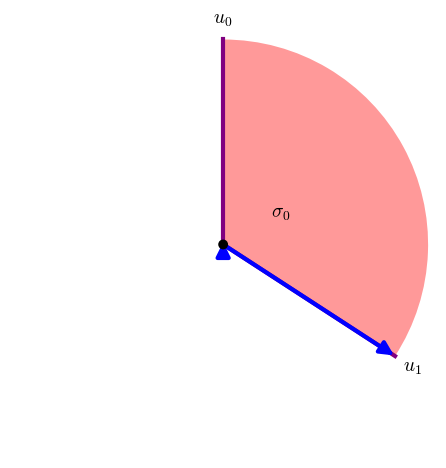

In [11]:
sigma = Cone([[0,1],(77,-50)])
print(sigma.rays())
sigma.plot()

In our first resolution step, we add the ray in direction $e_1 = (1,0)$. Then we apply the 90 degree rotation $A := \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$ to the bottom cone and apply the transform $B_c := \begin{bmatrix} 1 & 0 \\ c & 1 \end{bmatrix}$ with a suitable $c$. 

In terms of the generators, we go though 

> $(1,0) \to (0,1) \to (0,1)$;  
> $(77,-50) \to (50,77) \to (55,-23)$.

In [12]:
# For the convenience let's define the rotation matrix A and reduction matrix B
A = matrix([[0,-1],[1,0]])

def reduction_matrix(c):
    return matrix([[1,0],[c,1]])

# for isntance, use B = reduction_matrix(-2). 
B = reduction_matrix(-2)

A, B

(
[ 0 -1]  [ 1  0]
[ 1  0], [-2  1]
)

In [13]:
# So the points (1,0) and (77,-50) will be moved BA(1,0)^T and BA(77,-50)^T. Just to make sure, let's do this step by step.
A*vector([1,0]), A*vector([77,-50])


((0, 1), (50, 77))

In [14]:
# We already know which c to choose. Otherwise play with a few c to find the correct one (or use the division theorem.)
B = reduction_matrix(-2)
B*A*vector([1,0]), B*A*vector([77,-50])

((0, 1), (50, -23))

Now we can carry out the rest. Recall we want to find the subdivision of the original cone. So, the new ray (1,0) we add to this cone corresponds to the ray (BA)^{-1} (1,0). The following will provide that calculation.

In [15]:
(B*A).inverse()*vector([1,0])

(2, -1)

Now, let's add this ray to the original cone.

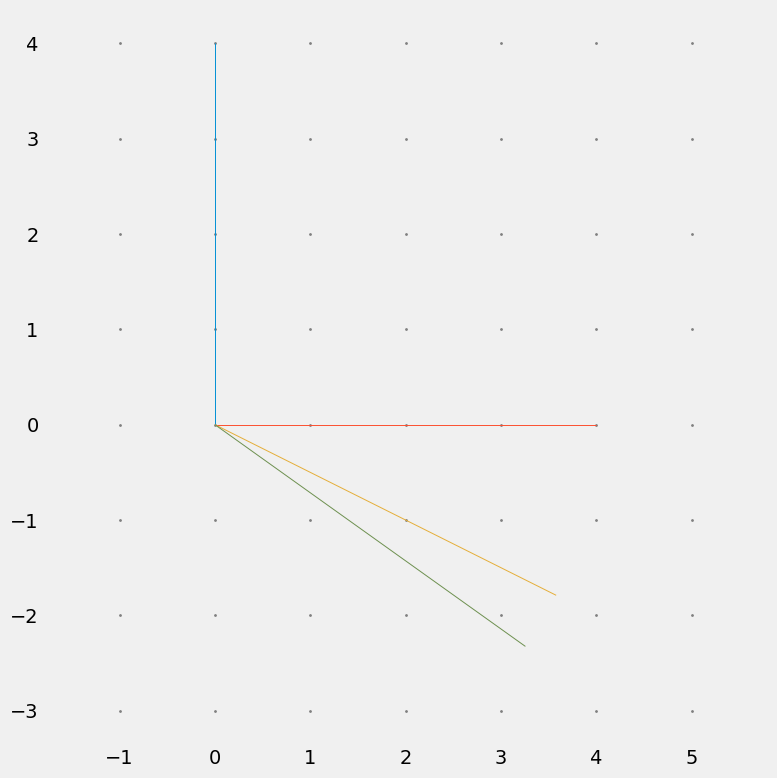

In [23]:
# Thus, in terms of the original cone, we have the following.
import matplotlib.pyplot as plt
import numpy as np 

rays = [
    (0,1),
    (1,0),
    (2,-1),
    # Add additional rays there; don't forget to put commas at the end (x,y),
    # Add as many as you need.
    (77,-55),
]

## once you put all the necessary rays above, the rest will be taken care by the following code. 
plt.style.use('fivethirtyeight')

plt.figure(figsize=(8,8))
xxx, yyy = np.meshgrid(range(-1,6), range(-3,5))
for x,y in zip(*(xxx,yyy)):
    plt.plot(x,y,'o',color='gray', markersize=1)

for x,y in rays:
    scale_factor =  4/np.sqrt(x*x + y*y )
    xx = [ 0, x * scale_factor ]
    yy = [ 0, y * scale_factor ]
    plt.plot(xx,yy,'-', linewidth=0.7)
    
plt.grid()
plt.axis('equal')
plt.tight_layout()
plt.savefig("output.png", dpi=150)


### HW problem 2

Find all the additional rays for the original cone to resolve the singularies of the given \( \sigma \). Add them in the cell above as part of the list ray. That is, update the following.

![list_ray](./photos/problem2_list_ray.png)

Feel free to add additional cells for your calculations. 

---

This is the last question of the quiz. Save the file then download it and upload it to Canvas. The file extension should be ``ipynb``. 

See the following image for a reference.

![save-download](./photos/save-download.png)

## Link to the assignment submission page

https://csusb.instructure.com/courses/24717/assignments/360205